In [1]:
include("../../src/WaterLily.jl")
WaterLily = Main.WaterLily;
using Plots; gr()
using StaticArrays
using JLD
using Images
using FFTW
using Statistics
using Interpolations
using DelimitedFiles
using LinearAlgebra
using PyPlot

In [2]:
N = (256,256,4)
D = length(N)

3

In [3]:
ins = WaterLily.cVOF(N; InterfaceSDF = (x) -> sqrt.((x[1]-49.5).^2+(x[2]-129.5).^2)-32, perdir=(1,2,3))

Main.WaterLily.cVOF{3, Float64, Array{Float64, 3}, Array{Float64, 4}}([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 

In [4]:
u = zeros((N.+2)...,D)
xList = reshape((1:N[1]+2).-2,(N[1]+2,1,1))
yList = reshape((1:N[2]+2).-2,(1,N[2]+2,1))
u[:,:,:,1] .= xList/N[1]
u[:,:,:,2] .= -yList/N[1]
# u[:,:,:,2] .= 1.0
# dt = 0.2
# for i ∈ 1:10
#     WaterLily.freeint_update!(dt, ins.f, ins.f⁰, ins.n̂, ins.α, u, u, ins.ϕᶠ, ins.c̄, perdir=ins.perdir, dirdir=ins.dirdir)
    
# end
# print(Statistics.mean(ins.f[2:end-1,2:end-1,2:end-1]))
# a = 1
# WaterLily.vof_reconstruct!(ins.f,ins.α,ins.n̂)
# WaterLily.vof_flux!(1,ins.f,ins.α,ins.n̂,dt*u,ins.ϕᶠ)
a = 1

1

┌ Info: Saved animation to /tmp/jl_DOXUncrKbq.gif
└ @ Plots /home/tyhuang/.julia/packages/Plots/3BCH5/src/animation.jl:156


Plots.AnimatedGif("/tmp/jl_DOXUncrKbq.gif")
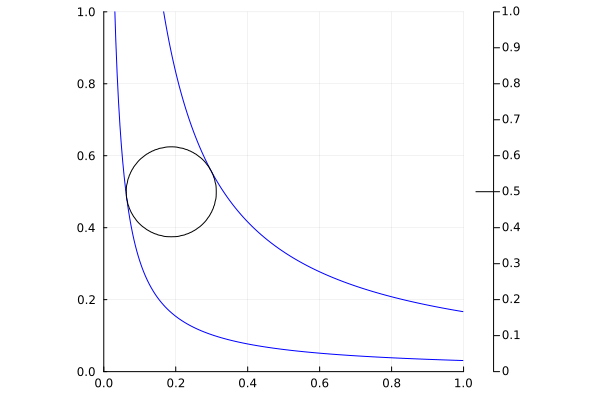

In [5]:
a = Animation()
c = []
dt = 0.2
xy = (θ) -> (0.1875+0.125*cos(θ))*(0.5+0.125*sin(θ))
u[:,:,:,1] .= xList/N[1]
u[:,:,:,2] .= -yList/N[1]
for i ∈ 1:1200
    push!(c,Statistics.mean(ins.f[2:end-1,2:end-1,2:end-1]))
    WaterLily.freeint_update!(dt, ins.f, ins.f⁰, ins.n̂, ins.α, u, u, ins.ϕᶠ, ins.c̄, perdir=ins.perdir, dirdir=ins.dirdir)
    Plots.plot()
    lx = ((1:N[1]).-0.5)/N[1]
    ly = ((1:N[2]).-0.5)/N[2]
    # Plots.heatmap!(lx,ly,ins.f[2:end-1,2:end-1,2]', aspect_ratio=:equal,color=:viridis,levels=6)
    Plots.plot!(lx, xy(3.272265307179586)./lx,legend=false, color=:blue)
    Plots.plot!(lx, xy(6.7728493071795866)./lx,legend=false, color=:blue)
    plt = Plots.contour!(lx,ly,ins.f[2:end-1,2:end-1,2]', aspect_ratio=:equal,color=:Black,levels=[0.5],xlimit=[0,1],ylimit=[0,1])
    if i%10==1
        frame(a,plt)
    end
end
u[:,:,:,1] .= -xList/N[1]
u[:,:,:,2] .= yList/N[1]
for i ∈ 1:1200
    push!(c,Statistics.mean(ins.f[2:end-1,2:end-1,2:end-1]))
    WaterLily.freeint_update!(dt, ins.f, ins.f⁰, ins.n̂, ins.α, u, u, ins.ϕᶠ, ins.c̄, perdir=ins.perdir, dirdir=ins.dirdir)
    Plots.plot()
    lx = ((1:N[1]).-0.5)/N[1]
    ly = ((1:N[2]).-0.5)/N[2]
    # Plots.heatmap!(lx,ly,ins.f[2:end-1,2:end-1,2]', aspect_ratio=:equal,color=:viridis,levels=6)
    Plots.plot!(lx, xy(3.272265307179586)./lx,legend=false, color=:blue)
    Plots.plot!(lx, xy(6.7728493071795866)./lx,legend=false, color=:blue)
    plt = Plots.contour!(lx,ly,ins.f[2:end-1,2:end-1,2]', aspect_ratio=:equal,color=:Black,levels=[0.5],xlimit=[0,1],ylimit=[0,1])
    if i%10==1
        frame(a,plt)
    end
end
gif(a)
# Plots.savefig("afaf.png")

In [6]:
fFinal = copy(ins.f);


In [7]:
sum(abs.(ins.f-fFinal)[2:end-1,2:end-1,2])

0.0

In [8]:
Plots.plot()
# Plots.contour!(lx,ly,fFinal[2:end-1,2:end-1,2]', aspect_ratio=:equal,color=:Black,levels=[0.5],xlimit=[0,1],ylimit=[0,1])
# Plots.contour!(lx,ly,ins.f[2:end-1,2:end-1,2]', aspect_ratio=:equal,color=:Blue,levels=[0.5],xlimit=[0,1],ylimit=[0,1])
Plots.contour!(lx,ly,ins.f[2:end-1,2:end-1,2]'-fFinal[2:end-1,2:end-1,2]', color=:batlow, aspect_ratio=:equal,xlimit=[0.0375, 0.3375],ylimit=[0.35,0.65],clim=(-0.05,0.05),levels=32)
Plots.savefig("cVOF_backerror.png")

UndefVarError: UndefVarError: `lx` not defined

In [9]:
Plots.contour(lx,ly,[1 2],ins.f[2:end-1,2:end-1,2:end-1],levels=[0.5],color=:black)

UndefVarError: UndefVarError: `lx` not defined

In [11]:
Plots.plot((c .-c[1])/c[1])
Plots.savefig("cVOF_masserror.png")

"/home/tyhuang/Documents/Github/WaterLily.jl/test/TYTest/cVOF_masserror.png"

In [11]:
ins.f[4:9,4:9,2]

6×6 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0

In [12]:
ins.f[2:end-1,2:end-1,2]'
sqrt.(sum(ins.n̂.^2,dims=[4])[2:end-1,2:end-1,2,1])'
ins.α[2:end-1,2:end-1,2]'

64×64 adjoint(::Matrix{Float64}) with eltype Float64:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮              ⋱                 ⋮              
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.

In [13]:
ins.ϕᶠ[5,5,2,1]

0.0

In [19]:
f = [
    0 0 0 0 0;
    0 0.125 0.5 0.125 0;
    0 0.5 1 0.5 0;
    0 0.125 0.5 0.125 0;
    0 0 0 0 0
]
a = reshape([1 1 1 1],(1,1,4))
f = f.*a;


In [20]:
n̂=zeros(size(f)...,3)
ff=zeros(size(f)...,3)
α = f*0
WaterLily.vof_reconstruct!(f,α,n̂,perdir=(1,2,3))

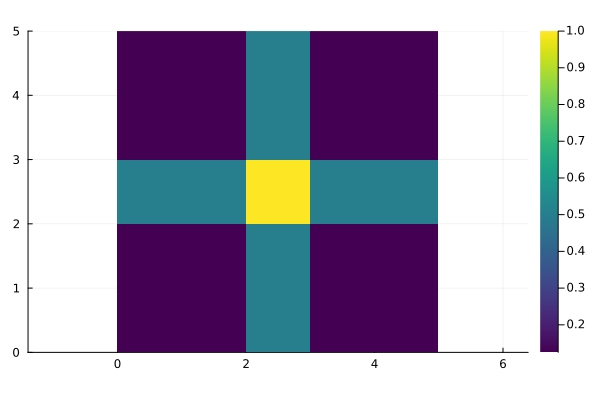

In [23]:
Plots.plot()
lx = (1:5).-0.5
ly = (1:5).-0.5
# Plots.heatmap!(lx,ly,atan.(n̂[:,:,2,2]',n̂[:,:,2,1]')*180/pi, aspect_ratio=:equal,color=:viridis,levels=6)
# Plots.heatmap!(lx,ly,n̂[:,:,2,1]', aspect_ratio=:equal,color=:viridis,levels=6)
Plots.heatmap!(lx,ly,f[:,:,3,1]', aspect_ratio=:equal,color=:viridis,levels=6)

In [4]:
atan.(n̂[:,:,2,2]',n̂[:,:,2,1]')*180/pi

5×5 Matrix{Float64}:
  41.1859   138.814   90.0   41.1859   138.814
 -41.1859  -138.814  -90.0  -41.1859  -138.814
  -0.0     -180.0      0.0   -0.0     -180.0
  41.1859   138.814   90.0   41.1859   138.814
 -41.1859  -138.814  -90.0  -41.1859  -138.814

In [5]:
WaterLily.vof_flux!(1,f,α,n̂,ff*0 .+0.5,ff)

In [6]:
f[:,:,2,1]'

5×5 adjoint(::Matrix{Float64}) with eltype Float64:
 0.125  0.125  0.5  0.125  0.125
 0.125  0.125  0.5  0.125  0.125
 0.5    0.5    1.0  0.5    0.5
 0.125  0.125  0.5  0.125  0.125
 0.125  0.125  0.5  0.125  0.125

In [7]:
ff[:,:,2,1]'

5×5 adjoint(::Matrix{Float64}) with eltype Float64:
 0.0  0.0  0.0    0.0   0.0
 0.0  0.0  0.125  0.25  0.0
 0.0  0.0  0.5    0.5   0.0
 0.0  0.0  0.125  0.25  0.0
 0.0  0.0  0.0    0.0   0.0

In [8]:

using GLMakie


In [9]:
r = LinRange(-1, 1, 100)
cube = [(x.^2 + y.^2 + z.^2) for x = r, y = r, z = r]
GLMakie.contour(ins.f, isorange = 0.05,levels=[0.5])

UndefVarError: UndefVarError: `ins` not defined